In [54]:
%load_ext autoreload
%autoreload 2

import matplotlib
import numpy as np
import local_env

import matplotlib.pyplot as plt
import warnings
import os 
import tensorflow as tf
from contextlib import contextmanager

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
@contextmanager
def suppress_warnings():
    # Save the current warning filters and logging level
    previous_warning_filters = warnings.filters[:]
    previous_tf_log_level = os.environ.get('TF_CPP_MIN_LOG_LEVEL', '0')
    previous_tf_logger_level = tf.get_logger().level

    # Suppress TensorFlow logging messages
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
    tf.get_logger().setLevel('ERROR')

    # Suppress all Python warnings
    warnings.filterwarnings('ignore')

    try:
        yield
    finally:
        # Restore the previous warning filters and logging level
        warnings.filters[:] = previous_warning_filters
        os.environ['TF_CPP_MIN_LOG_LEVEL'] = previous_tf_log_level
        tf.get_logger().setLevel(previous_tf_logger_level)


In [56]:
with suppress_warnings():
    import test_simple as test

In [57]:
with suppress_warnings():
    pred_states, particle_list, probability_list, intermediate_states  = test.test_dpf()

noisyfying data ... 
Loading these modules: {'mo_noise_generator', 'encoder', 'particle_proposer', 'obs_like_estimator'}
../models/tmp best_validation
'../models/tmp' 'best_validation'
Loaded the following variables:
encoder/convnet/conv_2d_0/w:0
encoder/convnet/conv_2d_0/b:0
encoder/convnet/conv_2d_1/w:0
encoder/convnet/conv_2d_1/b:0
encoder/convnet/conv_2d_2/w:0
encoder/convnet/conv_2d_2/b:0
encoder/linear/w:0
encoder/linear/b:0
particle_proposer/linear/w:0
particle_proposer/linear/b:0
particle_proposer/linear_1/w:0
particle_proposer/linear_1/b:0
particle_proposer/linear_2/w:0
particle_proposer/linear_2/b:0
particle_proposer/linear_3/w:0
particle_proposer/linear_3/b:0
particle_proposer/linear_4/w:0
particle_proposer/linear_4/b:0
mo_noise_generator/linear_0/w:0
mo_noise_generator/linear_0/b:0
mo_noise_generator/linear_1/w:0
mo_noise_generator/linear_1/b:0
mo_noise_generator/linear_2/w:0
mo_noise_generator/linear_2/b:0
obs_like_estimator/linear/w:0
obs_like_estimator/linear/b:0
obs_lik

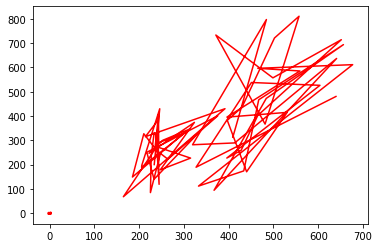

In [58]:
_ = plt.figure()
plt.plot(pred_states[:,0], pred_states[:,1], 'r')
#plt.savefig('pred_states.png')
#plt.show()

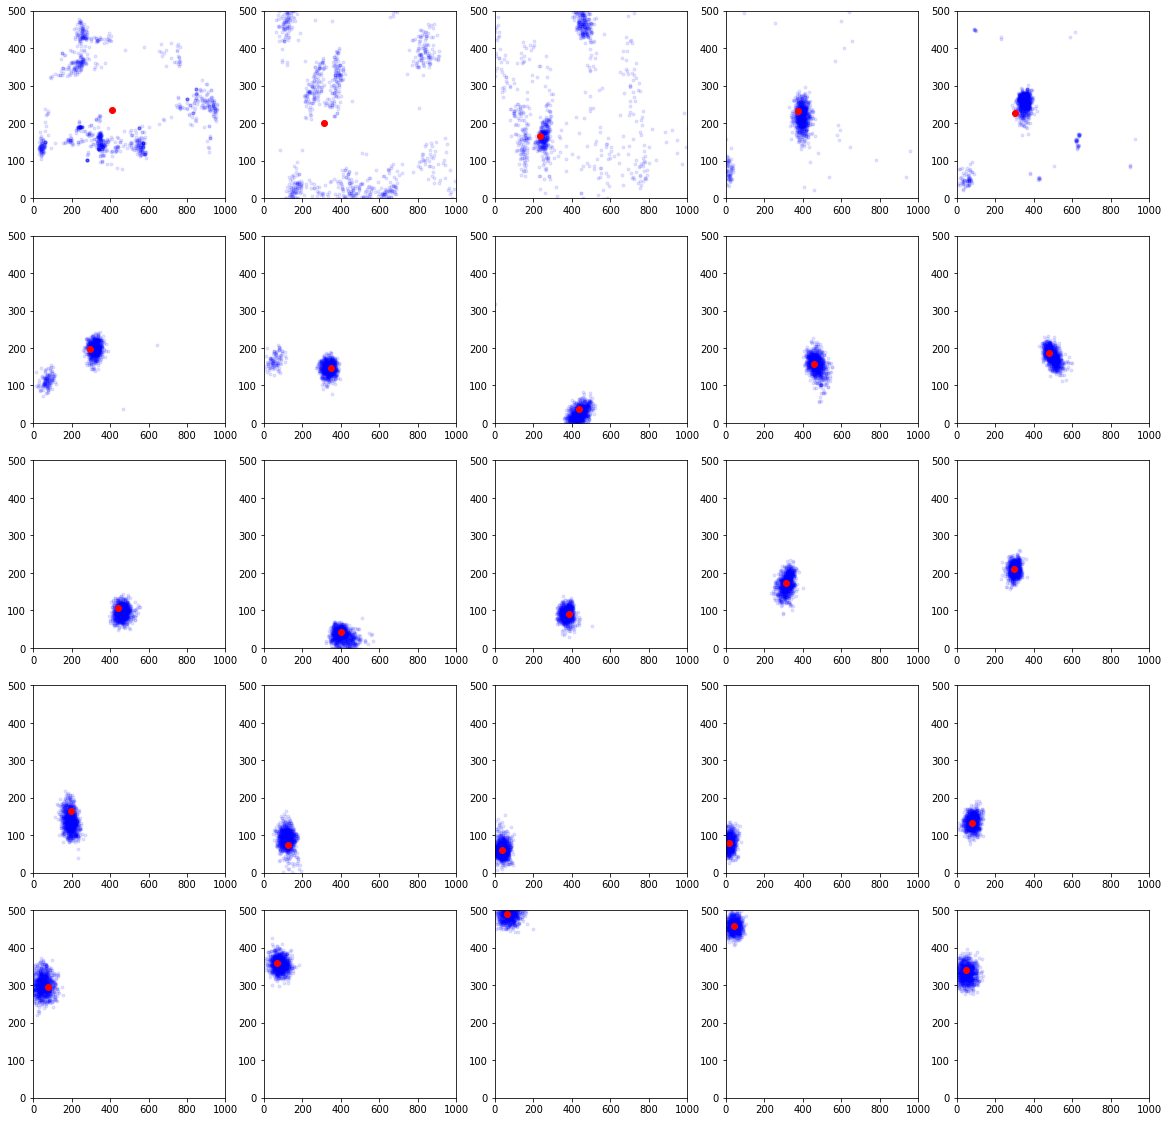

In [59]:
ibatch = 0

plt.subplots(5,5, figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)   
    plt.plot(particle_list[ibatch,i,:,0], particle_list[ibatch,i,:,1], 'b.', alpha = 0.1)
    plt.plot(pred_states[ibatch,i,0], pred_states[ibatch,i,1], 'ro')
    plt.xlim(0,1000)
    plt.ylim(0,500)

(array([18., 35., 19., 16.,  2.,  3.,  3.,  1.,  0.,  2.,  1.,  2.,  5.,
         6.,  5.,  1.,  9., 16., 10., 10., 15., 32., 31., 69., 47., 17.,
        27.,  9., 11.,  7.,  3., 10., 22., 53., 59., 32., 15.,  8., 10.,
         4.,  6.,  3.,  5.,  7.,  5.,  4.,  1.,  3.,  1.,  1.,  2.,  7.,
         5.,  3., 11., 13., 27., 23., 22., 15.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  2.,  3.,  1.,  4.,  0.,  0.,  1.,  2.,  1.,  1.,  8.,
        11.,  6.,  1.,  1.,  7.,  2.,  6.,  4.,  7., 16.,  6.,  1.,  4.,
         8.,  7.,  5., 11., 17.,  9., 16., 16.,  6.]),
 array([ 29.617584,  38.901882,  48.186176,  57.470474,  66.75477 ,
         76.03907 ,  85.323364,  94.60766 , 103.89196 , 113.176254,
        122.46055 , 131.74484 , 141.02914 , 150.31345 , 159.59773 ,
        168.88203 , 178.16634 , 187.45062 , 196.73492 , 206.01923 ,
        215.30351 , 224.58781 , 233.87212 , 243.1564  , 252.4407  ,
        261.725   , 271.0093  , 280.29358 , 289.57788 , 298.86218 ,
        308.14648 , 317.43

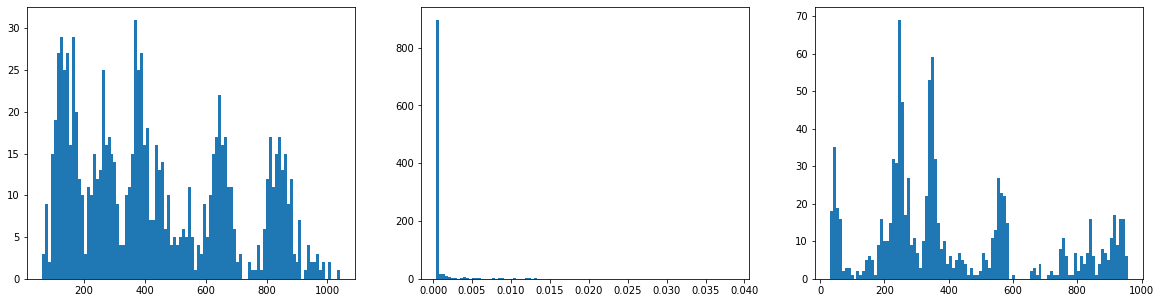

In [60]:
plt.subplots(1,3, figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(particle_list[ibatch,1,:,0].flatten(), bins=100)
plt.subplot(1,3,2)
plt.hist(probability_list[ibatch,1,:].flatten(), bins=100)
plt.subplot(1,3,3)
plt.hist(intermediate_states[ibatch,1,:,0].flatten(), bins=100)

In [61]:
n_bad = 0
bad_inds = []

for ibatch in range(32):
    for itime in range(49):
        for icoord in range(3):
            if not np.allclose(particle_list[ibatch,itime,:,icoord], intermediate_states[ibatch,itime+1,:,icoord]):
                n_bad += 1
                bad_inds.append((ibatch, itime, icoord))

print(n_bad)

print(bad_inds)

4536
[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 4, 0), (0, 4, 1), (0, 4, 2), (0, 5, 0), (0, 5, 1), (0, 5, 2), (0, 6, 0), (0, 6, 1), (0, 6, 2), (0, 7, 0), (0, 7, 1), (0, 7, 2), (0, 8, 0), (0, 8, 1), (0, 8, 2), (0, 9, 0), (0, 9, 1), (0, 9, 2), (0, 10, 0), (0, 10, 1), (0, 10, 2), (0, 11, 0), (0, 11, 1), (0, 11, 2), (0, 12, 0), (0, 12, 1), (0, 12, 2), (0, 13, 0), (0, 13, 1), (0, 13, 2), (0, 14, 0), (0, 14, 1), (0, 14, 2), (0, 15, 0), (0, 15, 1), (0, 15, 2), (0, 16, 0), (0, 16, 1), (0, 16, 2), (0, 17, 0), (0, 17, 1), (0, 17, 2), (0, 18, 0), (0, 18, 1), (0, 18, 2), (0, 19, 0), (0, 19, 1), (0, 19, 2), (0, 20, 0), (0, 20, 1), (0, 20, 2), (0, 21, 0), (0, 21, 1), (0, 21, 2), (0, 22, 0), (0, 22, 1), (0, 22, 2), (0, 23, 0), (0, 23, 1), (0, 23, 2), (0, 24, 0), (0, 24, 1), (0, 24, 2), (0, 25, 0), (0, 25, 1), (0, 25, 2), (0, 26, 0), (0, 26, 1), (0, 26, 2), (0, 27, 0), (0, 27, 1), (0, 27, 2), (0, 28, 0), (0, 28, 1), (0, 28, 2), (0, 29, 0), (

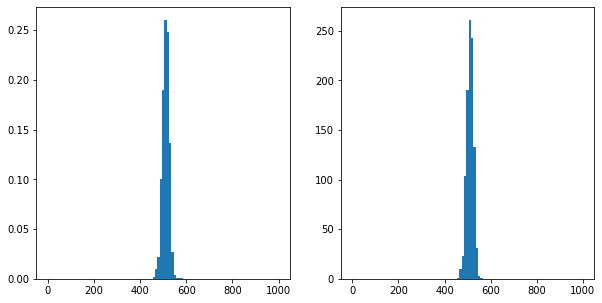

In [67]:
plt.subplots(1,2, figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(particle_list[ibatch,3-1,:,0], weights = probability_list[ibatch,3-1,:], bins=np.linspace(0,1000,100));
plt.subplot(1,2,2)
plt.hist(intermediate_states[ibatch,3,:,0], bins=np.linspace(0,1000,100));

In [68]:
print(particle_list.shape)

(32, 50, 1000, 3)


In [70]:
import pickle

In [71]:
save_dict = {
    'pre_resample_particle_distributions': particle_list,
    'pre_resample_particle_weights': probability_list,
    'post_resample_particle_distributions': intermediate_states,
}

fname = 'dpf_maze_task_particle_distributions.pickle'
with open('../data/' + fname, 'wb') as f:
    pickle.dump(save_dict, f)